In [688]:
# import libraries
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import nlp
import random
import pandas as pd
import numpy as np

# 1. Importing data

In [689]:
news = pd.read_csv('news.csv',encoding="gbk")
print(set(news['新闻类别']))
news.head()

{'国际', '文娱', '军事', '三农', '教育', '书画', '经济', '健康', '科技', '人物', '生活', '社会', '国内', '农经', '法治'}


,标题,标题链接,brief,keywords,发布时间,新闻类别,采集时的时间
0,273名境外男性被骗 江西通报多起电信诈骗案例,https://news.cctv.com/2021/04/24/ARTIGy2uTDQP0...,赣州各级法院审理的14起案件中，诈骗分子假冒海外女留学生，通过各类社交软件对境外的273名男...,"境外男性,被骗,电信诈骗",2021-04-24,法治,2021-04-24 17:05:14
1,河南新安警方通报“未成年女孩遭脱衣殴打”：一嫌犯被刑拘,https://news.cctv.com/2021/04/23/ARTI1jntJjhQu...,针对网传“未成年女孩遭脱衣殴打欺凌”视频，河南洛阳市新安县公安局官方微博@平安新安4月22日...,"殴打,新安县,未成年女孩",2021-04-23,法治,2021-04-24 17:05:14
2,你出国打工，你父母知道吗？小伙欲出国打工赚大钱被民警“灵魂拷问”,https://news.cctv.com/2021/04/23/ARTIZxSIe5N7d...,一名19岁的小伙儿在办理出国护照时，面对民警的一系列“灵魂拷问”终于坦白，为了出国“打洋工”...,"小伙,出国打工,赚大钱",2021-04-23,法治,2021-04-24 17:05:14
3,山东省威海市人大常委会原第一副主任、市委政法委原书记刘茂德接受纪律审查和监察调查,https://news.cctv.com/2021/04/23/ARTIq78F5xbiA...,山东省纪委监委22日发布通报，山东省威海市人大常委会原第一副主任、市委政法委原书记刘茂德涉嫌...,"刘茂德,纪律审查,监察调查",2021-04-23,法治,2021-04-24 17:05:14
4,延期开庭，“5年4次起诉遭驳回离婚案”再起波澜,https://news.cctv.com/2021/04/22/ARTI2cgxr52rG...,据湖南衡阳市衡阳县法院官方微博消息，衡阳县人民法院21日晚发布关于宁顺花诉陈定华离婚纠纷一案...,"宁顺花,陈定华,离婚",2021-04-22,法治,2021-04-24 17:05:14


/Users/xinyue/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xinyue/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30011 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xinyue/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xinyue/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xinyue/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31038 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xinyue/opt/anaconda3/lib/python3.8/site-packages/matp

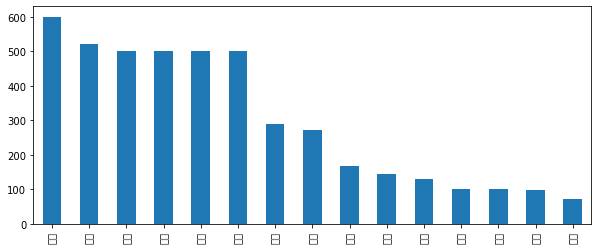

In [281]:
my_label = ['国际', '文娱', '军事', '三农', '教育', '书画', '经济', '健康', '科技', '人物', '生活', '社会', '国内', '农经', '法治']
plt.figure(figsize=(10,4))
news['新闻类别'].value_counts().plot(kind='bar');

In [282]:
temp = list((set(news['采集时的时间'])))
temp.sort()
print(temp)

['2021-04-24 16:42:20', '2021-04-24 16:42:21', '2021-04-24 16:42:23', '2021-04-24 16:42:24', '2021-04-24 16:42:25', '2021-04-24 16:42:26', '2021-04-24 16:42:27', '2021-04-24 16:42:28', '2021-04-24 16:42:29', '2021-04-24 16:42:30', '2021-04-24 16:42:31', '2021-04-24 16:42:32', '2021-04-24 16:42:33', '2021-04-24 16:42:34', '2021-04-24 16:42:35', '2021-04-24 16:42:36', '2021-04-24 16:42:37', '2021-04-24 16:42:39', '2021-04-24 16:42:40', '2021-04-24 16:42:42', '2021-04-24 16:42:43', '2021-04-24 16:42:44', '2021-04-24 16:42:45', '2021-04-24 16:42:46', '2021-04-24 16:42:47', '2021-04-24 16:42:48', '2021-04-24 16:42:49', '2021-04-24 16:42:50', '2021-04-24 16:42:51', '2021-04-24 16:42:52', '2021-04-24 16:42:54', '2021-04-24 16:42:55', '2021-04-24 16:42:57', '2021-04-24 16:42:58', '2021-04-24 16:42:59', '2021-04-24 16:43:00', '2021-04-24 16:43:01', '2021-04-24 16:43:02', '2021-04-24 16:43:03', '2021-04-24 16:43:04', '2021-04-24 16:43:05', '2021-04-24 16:43:06', '2021-04-24 16:43:07', '2021-04-2

我们得到了4492条新闻，其中每一条新闻由标题、标题链接、brief、keywords、发布时间、新闻类别、采集时的时间构成。其中新闻类别包括15个类别，采集时的时间包括2021-04-24 16:42:20到16:43:35，以及2021-04-24 16:53:36到2021-04-24 18:54:35，还有2021-05-27 18:19:06。

In [284]:
# important columns: 标题、brief、keywords、采集时的时间, label: 新闻类别
print('length of news:', len(news))
print('rows with blank 标题', len(news) - len(news['标题'].dropna()))
print('rows with blank brief', len(news) - len(news['brief'].dropna()))
print('rows with blank keywords', len(news) - len(news['keywords'].dropna()))
print('rows with blank 采集时的时间', len(news) - len(news['采集时的时间'].dropna()))
print('rows with blank 新闻类别', len(news) - len(news['新闻类别'].dropna()))

length of news: 4492
rows with blank 标题 75
rows with blank brief 9
rows with blank keywords 1220
rows with blank 采集时的时间 0
rows with blank 新闻类别 0


In [285]:
news[news['brief'].isna()]

,标题,标题链接,brief,keywords,发布时间,新闻类别,采集时的时间
2021,广西南宁：勤训轮换，贴近实战砺精兵,https://military.cctv.com/2021/04/17/PHOATCGTO...,NaN,"武警,任务实际,军事训练,集训",2021-04-17,军事,2021-04-24 17:53:48
2028,武警防城港支队：多课目实战训练 锤炼反恐尖兵,https://military.cctv.com/2021/04/15/PHOAWRLvg...,NaN,"武警,实战训练,反恐尖兵",2021-04-15,军事,2021-04-24 17:53:48
2029,雷霆出击 克敌制胜：武警广西总队贺州支队特战分队开展反恐综合演练影像,https://military.cctv.com/2021/04/15/PHOA9qWDH...,NaN,"武警,特战分队,反恐,演练",2021-04-15,军事,2021-04-24 17:53:48
2038,广西贵港：武警官兵实战化训练锻造过硬本领,https://military.cctv.com/2021/04/12/PHOArzAlm...,NaN,"武警,官兵,实战化,训练,锻造",2021-04-12,军事,2021-04-24 17:53:48
2081,北部湾畔激战正酣，看特战队员们火力全开！,https://military.cctv.com/2021/04/03/PHOAz2jbg...,NaN,"北部湾,特战队员,射击,反恐",2021-04-03,军事,2021-04-24 17:53:48
2085,酷！一组图带你直击武警特战队员训练精彩瞬间,https://military.cctv.com/2021/04/02/PHOAd8IKd...,NaN,"武警,特战队员,精彩瞬间",2021-04-02,军事,2021-04-24 17:53:48
2086,广西北海：武警反恐演练 提升实战能力,https://military.cctv.com/2021/04/02/PHOAm1e6U...,NaN,"武警,反恐演练,实战能力",2021-04-02,军事,2021-04-24 17:53:48
2091,指挥引导 联合作战：织密海空信息网,https://military.cctv.com/2021/04/01/PHOANtvc1...,NaN,"海空,信息网,联合作战,海军航空兵",2021-04-01,军事,2021-04-24 17:53:48
2101,七天六夜“魔鬼周”看特战队员的涅槃之路,https://military.cctv.com/2021/03/31/PHOALSUT1...,NaN,"魔鬼周,特战队员,涅槃之路",2021-03-31,军事,2021-04-24 17:53:48


In [286]:
# replace the black brief with '标题'
values = news[news['brief'].isna()]['标题']
news['brief'].fillna(value = values, inplace = True)

In [287]:
# consider to add the keywords to these 1220 rows later
news[news['keywords'].isna()]

,标题,标题链接,brief,keywords,发布时间,新闻类别,采集时的时间
2369,四川内江：乡土人才“四聚焦” 助力乡村振兴,https://sannong.cctv.com/2021/04/23/ARTI8OIQZS...,['乡村要振兴，人才是关键。四川省内江市市中区紧扣乡村人才振兴发展战略，聚焦乡土人才“引”“...,NaN,21-4-23,三农,2021-04-24 18:39:31
2370,农业农村部：猪肉均价比22日下降0.3%,https://sannong.cctv.com/2021/04/23/ARTIqWfPxb...,['据农业农村部监测，4月23日“农产品批发价格200指数”为119.38，比4月22日下降...,NaN,21-4-23,三农,2021-04-24 18:39:31
2371,克里米亚8万多支郁金香竞相开放 花期持续到5月中旬,https://sannong.cctv.com/2021/04/23/ARTIP1uOkQ...,['据俄罗斯媒体报道，近日，在克里米亚尼基茨基植物园，年度郁金香花展开幕，8万多支数百个品种...,NaN,21-4-23,三农,2021-04-24 18:39:31
2372,农业农村部对一系列重大工程项目开展全面排查 包括重大试点类任务,https://sannong.cctv.com/2021/04/23/ARTIdCSmjA...,['播放视频农业农村部有关负责人表示，“十四五”期间，全面实施乡村振兴战略的一系列重大工程、...,NaN,21-4-23,三农,2021-04-24 18:39:31
2373,四川、贵州、青海三省加大金融投入 服务乡村振兴,https://sannong.cctv.com/2021/04/23/ARTIk0BJdZ...,['播放视频银保监会4月22日召开新闻发布会。四川、贵州、青海三省银保监局负责人介绍了银行业...,NaN,21-4-23,三农,2021-04-24 18:39:31
...,...,...,...,...,...,...,...
4356,瑞犬迎春——典藏中的犬文化,http://arts.cctv.com/2018/02/27/ARTIkD6BvvBGRy...,农历戊戌年来临，戌年的生肖是犬。在中国古代，对犬多加好评。晋人傅玄曾作赋咏犬，开篇就说：“盖...,NaN,NaN,书画,2021-05-27 18:19:06
4357,元宵喜迎春 从《明宪宗元宵行乐图》看古人过元宵,http://arts.cctv.com/2018/02/27/ARTI3vlfP8QqhV...,从宋代孟元老《东京梦华录》、吴自牧《梦粱录》、周密《武林旧事》书中记载可知，早在宋代，对于元...,NaN,NaN,书画,2021-05-27 18:19:06
4358,“韵人雅和”庆新春（下篇）,http://arts.cctv.com/2018/02/24/ARTI3KrpHqBXFx...,今年新春伊始，中华诗词学会常务副会长、《中华诗词》杂志社社长李文朝将军一首内涵丰富、寓意深刻...,NaN,NaN,书画,2021-05-27 18:19:06
4359,“韵人雅和”庆新春（中篇）,http://arts.cctv.com/2018/02/24/ARTIKjT0Z1Dx78...,今年新春伊始，中华诗词学会常务副会长、《中华诗词》杂志社社长李文朝将军一首内涵丰富、寓意深刻...,NaN,NaN,书画,2021-05-27 18:19:06


In [288]:
# 将每一篇文章转换成一个list
brief = news.brief.values.tolist()
brief[4491]

'上周，两档团体偶像节目扎堆更新，《创造营2021》和《青春有你3》还首次在同一档期正面对抗，一次性上线200多位练习生的激烈场面，也再次将国内偶像团体综艺节目竞争的白热化摆到了台前。'

# 2.分词

In [114]:
# !pip install jieba
import jieba
import os

     |████████████████████████████████| 19.2 MB 5.1 MB/s eta 0:00:01    |██████                          | 3.6 MB 3.5 MB/s eta 0:00:05
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314478 sha256=6eaa46a13a01855f215f1ea82f24440f03cf363f2b16cefefec8ad7855672e7a
  Stored in directory: /Users/xinyue/Library/Caches/pip/wheels/ca/38/d8/dfdfe73bec1d12026b30cb7ce8da650f3f0ea2cf155ea018ae
Successfully built jieba


In [337]:
brief_S = []
for page in brief:
    current_segment = jieba.lcut(page) #对每一篇文章进行分词
    if len(current_segment) > 1 and current_segment != '\r\n': #换行符
        brief_S.append(current_segment) #保存分词的结果

In [338]:
print(brief_S[4491])

['上周', '，', '两档', '团体', '偶像', '节目', '扎堆', '更新', '，', '《', '创造', '营', '2021', '》', '和', '《', '青春', '有', '你', '3', '》', '还', '首次', '在', '同一', '档期', '正面', '对抗', '，', '一次性', '上线', '200', '多位', '练习生', '的', '激烈', '场面', '，', '也', '再次', '将', '国内', '偶像', '团体', '综艺节目', '竞争', '的', '白热化', '摆到', '了', '台前', '。']


In [339]:
df_brief=pd.DataFrame({'brief_S':brief_S}) #专门展示分词后的结果
df_brief.head()

,brief_S
0,"[赣州, 各级, 法院, 审理, 的, 14, 起, 案件, 中, ，, 诈骗, 分子, 假..."
1,"[针对, 网传, “, 未成年, 女孩, 遭, 脱衣, 殴打, 欺凌, ”, 视频, ，, ..."
2,"[一名, 19, 岁, 的, 小伙儿, 在, 办理, 出国, 护照, 时, ，, 面对, 民..."
3,"[山东省, 纪委, 监委, 22, 日, 发布, 通报, ，, 山东省, 威海市, 人大常委..."
4,"[据, 湖南, 衡阳市, 衡阳县, 法院, 官方, 微博, 消息, ，, 衡阳县, 人民法院..."


In [340]:
# 加载停用词字典数据进行数据清洗
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords.head(10)

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [341]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words  

In [342]:
contents = df_brief.brief_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
brief_clean, all_words = drop_stopwords(contents,stopwords)

In [343]:
df_brief=pd.DataFrame({'brief_clean': brief_clean})
df_brief.tail()

,brief_clean
4487,"[2020, 河南, 博物院, 考古, 盲盒, 火]"
4488,"[国家, 宝藏, 国宝, 说话, 文博, 类节目, 观众, 拉近, 历史, 文化遗产, 观众..."
4489,"[多部, 国产, 剧, 外国, 影视, 公司, 翻拍, 一种, 文化, 现象, 翻拍, 国产..."
4490,"[今年春节, 档, 国内, 电影, 市场, 异常, 火爆, 创造, 多项, 新纪录, 七大,..."
4491,"[上周, 两档, 团体, 偶像, 节目, 扎堆, 更新, 创造, 营, 2021, 青春, ..."


In [344]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.tail()

,all_words
122923,综艺节目
122924,竞争
122925,白热化
122926,摆到
122927,台前


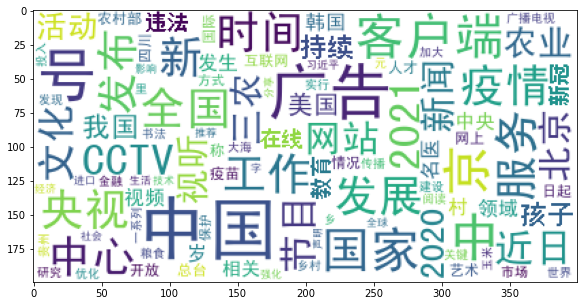

In [294]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
woordcloud_data = df_all_words.all_words.value_counts()[:100]
wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",max_font_size=80)
wordcloud=wordcloud.fit_words(woordcloud_data)
plt.imshow(wordcloud)

# 3. TF-IDF：提取关键词

In [295]:
import jieba.analyse #工具包
index = 4491
brief_S_str = "".join(brief_S[index]) #把分词的结果组合在一起，形成一个句子
print (brief_S_str) #打印这个句子
print ("  ".join(jieba.analyse.extract_tags(brief_S_str, topK=5, withWeight=False)))#选出来5个核心词

上周，两档团体偶像节目扎堆更新，《创造营2021》和《青春有你3》还首次在同一档期正面对抗，一次性上线200多位练习生的激烈场面，也再次将国内偶像团体综艺节目竞争的白热化摆到了台前。
偶像  团体  练习生  两档  2021


In [296]:
print(news['keywords'][[4491]])

4491    男团,偶像节目,代际危机
Name: keywords, dtype: object


还是很不一样的。

In [297]:
# fill in all keywords
values = []
for index, row in news[news['keywords'].isna()].iterrows():
    value = ",".join(jieba.analyse.extract_tags(row['brief'], topK=5, withWeight=False))
    news.iloc[index]['keywords'] = value

In [298]:
len(news[news['keywords'].isna()])

0

# 4. 词袋模型

In [511]:
df_train=pd.DataFrame({'brief_clean':brief_clean,'label':news['新闻类别'], 'keywords':news['keywords']})
df_train.tail()

,brief_clean,label,keywords
4487,"[2020, 河南, 博物院, 考古, 盲盒, 火]",文娱,"考古,文创,盲盒"
4488,"[国家, 宝藏, 国宝, 说话, 文博, 类节目, 观众, 拉近, 历史, 文化遗产, 观众...",文娱,"文物,国家宝藏,文博"
4489,"[多部, 国产, 剧, 外国, 影视, 公司, 翻拍, 一种, 文化, 现象, 翻拍, 国产...",文娱,国产剧
4490,"[今年春节, 档, 国内, 电影, 市场, 异常, 火爆, 创造, 多项, 新纪录, 七大,...",文娱,"哪吒,时代语境"
4491,"[上周, 两档, 团体, 偶像, 节目, 扎堆, 更新, 创造, 营, 2021, 青春, ...",文娱,"男团,偶像节目,代际危机"


In [512]:
# 进行映射关系的处理
print(set(news['新闻类别'])) #查看总共有多少个唯一的标签，然后在进行映射
label_mapping = {'国际':1, '文娱':2, '军事':3, '三农':4, '教育':5, '书画':6, '经济':7, '健康':8, '科技':9, '人物':10, '生活':11, '社会':12, '国内':13, '农经':14, '法治':15}
df_train['label'] = df_train['label'].map(label_mapping) #构建一个映射方法
df_train.tail()

{'国际', '文娱', '军事', '三农', '教育', '书画', '经济', '健康', '科技', '人物', '生活', '社会', '国内', '农经', '法治'}


,brief_clean,label,keywords
4487,"[2020, 河南, 博物院, 考古, 盲盒, 火]",2,"考古,文创,盲盒"
4488,"[国家, 宝藏, 国宝, 说话, 文博, 类节目, 观众, 拉近, 历史, 文化遗产, 观众...",2,"文物,国家宝藏,文博"
4489,"[多部, 国产, 剧, 外国, 影视, 公司, 翻拍, 一种, 文化, 现象, 翻拍, 国产...",2,国产剧
4490,"[今年春节, 档, 国内, 电影, 市场, 异常, 火爆, 创造, 多项, 新纪录, 七大,...",2,"哪吒,时代语境"
4491,"[上周, 两档, 团体, 偶像, 节目, 扎堆, 更新, 创造, 营, 2021, 青春, ...",2,"男团,偶像节目,代际危机"


In [696]:
print(pd.DataFrame(label_mapping, index=['mapping']))

         国际  文娱  军事  三农  教育  书画  经济  健康  科技  人物  生活  社会  国内  农经  法治
mapping   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15


In [711]:
# 进行数据特征的处理

# 划分训练集和测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train['brief_clean'].values, df_train['label'].values, random_state=1)

In [514]:
# 把新闻数据的类型由列表全部转化为指定的格式
train_words = []
for line_index in range(len(x_train)):
    try:
        #
        train_words.append(' '.join(x_train[line_index]))
    except:
         print (line_index ,word_index)
print(type(train_words))

<class 'list'>


In [515]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(analyzer='word',lowercase = False)
feature = vec.fit_transform(train_words)
print(feature.shape)

# 3369篇文章共创建的语料库的容量为2w多，而限制保留指定的特征后，就会选取词汇频数最大的4000个进行保留，以避免稀疏矩阵
vec = CountVectorizer(analyzer='word', max_features=4000,  lowercase = False)
feature = vec.fit_transform(train_words)
print(feature.shape)

(3369, 20718)
(3369, 4000)


In [516]:
# print(vec.get_feature_names())
print(feature.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [517]:
# 实现词袋模型的特征建模，导入贝叶斯模型
from sklearn.naive_bayes import MultinomialNB #贝叶斯模型
classifier = MultinomialNB() 
classifier.fit(feature, y_train)

MultinomialNB()

In [518]:
# 将进行检测的数据也需要转化为一致的格式
test_words = []
for line_index in range(len(x_test)):
    try:
        #
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index,word_index)
test_words[1]

'2021 点 广西 防城港市 上思县 思阳 镇江 平村 路口 一辆 装满 沙子 货车 侧翻 司机 被困 请求 救援 接到 报警 上思县 消防 救援 大队 出动 车 名 消防 指战员 赶赴现场 施救'

In [519]:
# 进行模型得分的评测
classifier.score(vec.transform(test_words), y_test)

0.6829919857524488

In [706]:
# 用这个模型进行预测一下，看看文本分类的结果
print(classifier.predict(vec.transform(test_words)[1]))

# 查看一下对应的标签，并对应上最初的映射结果
print(y_test[1])
print(['{}:{}'.format(key,value) for key,value in filter(lambda x:12 == x[1], label_mapping.items())])

[12]
12
['社会:12']


# 5. TF-IDF制作特征

In [521]:
# 用TF-IDF来提取特征
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(train_words)
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(train_words), y_train)
classifier.score(vectorizer.transform(test_words), y_test)

0.6215494211932324

Not good.

# 6.用关键词预测新闻类别

In [707]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train['keywords'].values, df_train['label'].values, random_state=1)

# 把新闻数据的类型由列表全部转化为指定的格式
train_words = []
for line_index in range(len(x_train)):
    try:
        #
        train_words.append(' '.join(x_train[line_index].split(',')))
    except:
         print (line_index ,word_index)

test_words = []
for line_index in range(len(x_test)):
    try:
        #
        test_words.append(' '.join(x_test[line_index].split(',')))
    except:
         print (line_index ,word_index)

In [708]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(analyzer='word',lowercase = False)
feature = vec.fit_transform(train_words)
print(feature.shape)

# 词袋模型
vec = CountVectorizer(analyzer='word', max_features=4000, lowercase = False)
feature = vec.fit_transform(train_words)
classifier = MultinomialNB() 
classifier.fit(feature, y_train)
print('词袋模型:',classifier.score(vec.transform(test_words), y_test))

# 用TF-IDF来提取特征
vectorizer = TfidfVectorizer(analyzer='word', max_features=4000, lowercase = False)
vectorizer.fit(train_words)
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(train_words), y_train)
print('TF-IDF:',classifier.score(vectorizer.transform(test_words), y_test))

(3369, 7328)
词袋模型: 0.4781834372217275
TF-IDF: 0.45859305431878894


This is so bad.

In [524]:
# 用这个模型进行预测一下，看看文本分类的结果
print(test_words[1])
print(classifier.predict(vec.transform(test_words)[1]))
print(['{}:{}'.format(key,value) for key,value in filter(lambda x:6 == x[1], label_mapping.items())])

# 查看一下对应的标签，并对应上最初的映射结果
print(y_test[1])
print(['{}:{}'.format(key,value) for key,value in filter(lambda x:12 == x[1], label_mapping.items())])

广西 上思 消防
[6]
['书画:6']
12
['社会:12']


This doesn't make sense.

# 7. 用关键词和brief做预测

In [710]:
words1 = []
for line_index in range(len(df_train['brief_clean'])):
    try:
        #
        words1.append(' '.join(df_train['brief_clean'].values[line_index]))
    except:
         print (line_index ,word_index)
# print(type(words1))

In [565]:
words2 = []
for line_index in range(len(df_train['keywords'])):
    try:
        #
        words2.append(' '.join(df_train['keywords'][line_index].split(',')))
    except:
         print (line_index ,word_index)

In [584]:
# Combine brief and keywords into a new colomn
words = []
for i in range(len(words2)):
    words.append(words1[i]+words2[i])

In [587]:
words[0]

'赣州 法院 审理 案件 中 诈骗 分子 假冒 海外 女 留学生 各类 社交 软件 境外 273 名 男性 实施 诈骗境外男性 被骗 电信诈骗'

In [602]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(words, df_train['label'].values, random_state=1)

vec = CountVectorizer(analyzer='word',lowercase = False)
feature = vec.fit_transform(x_train)
print(feature.shape)

# 词袋模型
vec = CountVectorizer(analyzer='word', max_features=4000, lowercase = False)
feature = vec.fit_transform(x_train)
classifier = MultinomialNB() 
classifier.fit(feature, y_train)
print('词袋模型:',classifier.score(vec.transform(x_test), y_test))

# 用TF-IDF来提取特征
vectorizer = TfidfVectorizer(analyzer='word', max_features=4000, lowercase = False)
vectorizer.fit(x_train)
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(x_train), y_train)
print('TF-IDF:',classifier.score(vectorizer.transform(x_test), y_test))

(3369, 25226)
词袋模型: 0.6901157613535174
TF-IDF: 0.6268922528940338


It deed improves a little. But it doesn't improve much.

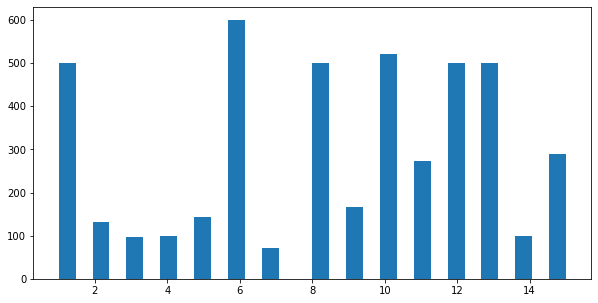

In [607]:
plt.hist(df_train['label'], bins = 30); # Unbalanced

# 8. RNN模型

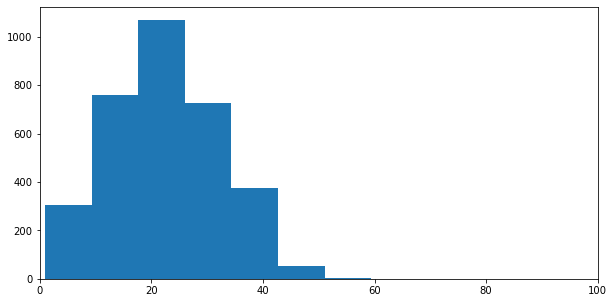

In [669]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=4000, oov_token='<UNK>') # oov_token is not frequently used words.
tokenizer.fit_on_texts(x_train) # Map texts to numbers

lengths = [len(t.split(' ')) for t in x_train]
plt.hist(lengths, bins = len(set(lengths)))
plt.xlim(0,100)
plt.show()

Most of the lengths are about 0-50 words long.

In [679]:
maxlen = 50 #truncate them
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_sequences(tokenizer, train):
    sequences = tokenizer.texts_to_sequences(train)
    padded = pad_sequences(sequences, truncating='post',padding='post', maxlen=maxlen)
    return padded

padded_train_seq = get_sequences(tokenizer, x_train)

In [680]:
padded_train_seq.shape

(3369, 50)

In [681]:
test_seq = get_sequences(tokenizer, x_test)

In [682]:
# Create the model
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(4000, 16, input_length=maxlen),    
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=2)),  
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)), 
        tf.keras.layers.Dense(16, activation='softmax')                     
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [683]:
tf.keras.layers.Embedding(4000, 16, input_length=maxlen)

In [684]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 50, 16)            64000     
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 50, 40)            5920      
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 40)                9760      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                656       
Total params: 80,336
Trainable params: 80,336
Non-trainable params: 0
_________________________________________________________________


In [685]:
# Train the model
h = model.fit(
    padded_train_seq, y_train, 
    validation_data = (test_seq, y_test),
    epochs = 20,
    callbacks = [
                 tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20
106/106 [==============================] - 8s 36ms/step - loss: 2.5414 - accuracy: 0.1538 - val_loss: 2.3814 - val_accuracy: 0.2386
Epoch 2/20
106/106 [==============================] - 3s 28ms/step - loss: 2.1511 - accuracy: 0.3256 - val_loss: 2.0053 - val_accuracy: 0.3598
Epoch 3/20
106/106 [==============================] - 3s 29ms/step - loss: 1.6867 - accuracy: 0.4812 - val_loss: 1.7724 - val_accuracy: 0.4506
Epoch 4/20
106/106 [==============================] - 3s 28ms/step - loss: 1.3392 - accuracy: 0.6031 - val_loss: 1.7044 - val_accuracy: 0.4951
Epoch 5/20
106/106 [==============================] - 3s 28ms/step - loss: 1.0753 - accuracy: 0.6916 - val_loss: 1.7020 - val_accuracy: 0.5147
Epoch 6/20
106/106 [==============================] - 3s 28ms/step - loss: 0.8905 - accuracy: 0.7415 - val_loss: 1.7042 - val_accuracy: 0.5272
Epoch 7/20
106/106 [==============================] - 3s 28ms/step - loss: 0.7647 - accuracy: 0.7795 - val_loss: 1.7660 - val_accuracy: 0.5218

In [677]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

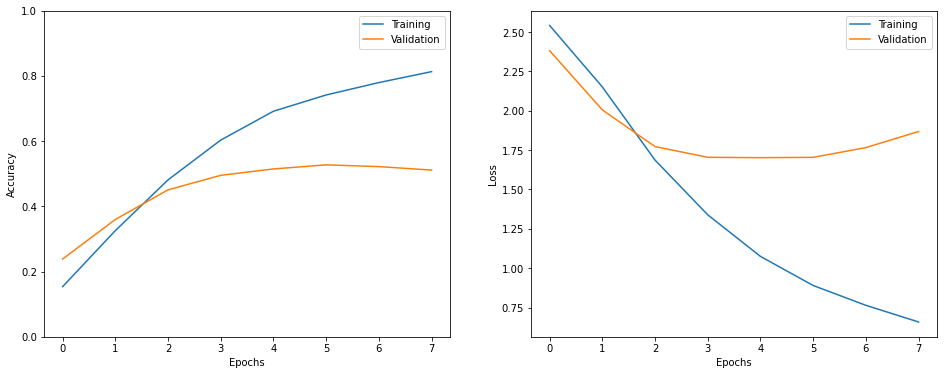

In [686]:
show_history(h)